<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="200" /></center>


<center><img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble1.png" /></center>

## Table of Content

1. [Introduction to Ensemble Learning](#section1)<br>
    - 1.1 [Implementation of Algorithm Using Python](#section101)<br>
    - 1.2 [Advantages and Disadvantages](#section102)<br>
2. [Use Case : Housing Data](#section2)<br>
3. [Importing packages](#section3)<br>
4. [Data loading and description](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Modelling and Prediction](#section6)<br>
    - 6.1 [Getting some classifiers to evaluate](#section601)<br>
    - 6.2 [When to and how to use soft voting](#section602)<br>
    - 6.3 [Create Bagging Classifiers](#section603)<br>
    - 6.4 [Create Boosting Classifiers](#section604)<br>
7. [Metric Comparison](#section7)
7. [Conclusion](#section8)

<a id='section1'></a>
## 1. Introduction

When you want to purchase some new laptop, will you walk up to the first shop and an purchase one based on the advice of the dealer there? It's highly unlikely. <img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble2.png" /> <br/>
- You would __likely browse__ a few __web portals__ where people have posted their reviews and compare different laptop models, checking for their __features__, __speciifcations__ and __prices__.<br>
- You will also probably __ask__ your __friends and colleagues__ for their opinion. <br>
- In short, you wouldn’t directly reach a conclusion, but will instead make a decision __considering the opinions__ of other people as well.

The objective of this notebook is to introduce the concept of __ensemble learning__ and understand the __algorithms__ which use this __technique__.

__Ensemble Learning__ : An ensemble is itself a __supervised learning algorithm__, becuase it can be __trained__ and then used to __make predictions__.<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble3.png" />

Another way to think about Ensemble learning is __Fable of blind men and elephant__. 
- All of the blind men had their own description of the elephant. 
- Even though each of the description was true, it would have been better to come together and discuss their undertanding before coming to final conclusion. 
- This story perfectly describes the Ensemble learning method.

__Ensemble Algorithm__ : The _goal_ of ensemble algorithms is to __combine__ the __predictions of several base estimators__ built with a given learning algorithm in order to __improve robustness__ over a single estimator`.

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble4.png" />

There are two families of ensemble methods which are usually distinguished:<br><br>
1. __Averaging Method__ : The driving principle is to build a several estimators independetly and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br>
__Examples__: Bagging methods, Forests of randomized trees<br><br>

2. __Boosting Methods__ : Base estimators are built sequentially and one tries to reduce the bias of combined estimator. This motivation is to combine several weak models to produce a powerful ensemble.<br>
__Examples__: AdaBoost, Gradient Tree Boosting

Two most popular ensemble methods are __bagging__ and __boosting__<br><br>
- __Bagging__: Training a bunch of individual models in a __parallel__ way. Each model is trained by a random subset of the data.<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble5.png" />

- __Boosting__: Training a bunch of individual models in a __sequential__ way. Each individual model learns from mistakes made by the previous model.<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble6.png" />

<a id="section101"></a>
### 1.1 Implementation of algorithm using Python sklearn.
### RANDOM FOREST

__Random forest__ is a model using __bagging__ as the ensemble method and __decision tree as the individual model__.<br>
Let's take a look at the __magic of randomness__

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble7.png" />
Select __n (e.g. 1000) random subsets__ from the training set

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble8.png" />
__Train n (e.g. 1000) decision trees__

- one random subset is used to train one decision tree<br><br>
- the optimal splits for each decision tree are based on a random subset of features (e.g. 10 features in total, randomly select 5 out of 10 features to split)

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble9.png" /><br>
__Each individual tree__ predicts the records/candidates in the test set, independently.

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensembl10.png" /><br>
 __Make the final prediction__

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the __majority vote__ as this candidate’s final prediction.

Of course, our 1000 trees are the parliament here.

### ADABOOST (ADAPTIVE BOOSTING)

- AdaBoost is a boosting model and works especially well with the decision tree. 
- Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble11.png" />

__Step 0__: __Initialize the weights__ of data points. if the training set has __100__ data points, then __each point’s__ initial weight should be __1/100 = 0.01__.

__Step 1__: __Train__ a decision tree

__Step 2__: 
- __Calculate the weighted error rate (e)__ of the decision tree. 
- The weighted error rate (e) is just __how many wrong predictions__ out of total and you treat the wrong predictions differently based on its data point’s weight. 
- __The higher the weight, the more the corresponding error will be weighted__ during the calculation of the (e).

__Step 3__: 
- __Calculate this decision tree’s weight__ in the ensemble

- The weight of this tree = learning rate * log( (1 — e) / e)

- The __higher weighted error__ rate of a tree, 😫, the __less decision power__ the tree will be given during the later voting and 😃 vice versa.

__Step 4__: 
- __Update weights__ of wrongly classified points

The weight of each data point =

    - if the model got this data point correct, the weight stays the same
    - if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
__Note__: 
- The __higher the weight__ of the tree (more accurate this tree performs), the __more boost__ (importance) the misclassified data point by this tree will get. 
- The weights of the data points are __normalized after all the misclassified points are updated__.

__Step 5__: __Repeat__ Step 1(until the number of trees we set to train is reached)<br>

__Step 6__: __Make the final prediction__

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble12.png" /><br>

- The tree with __higher weight__ will have __more power of influence__ on the final decision.

### GRADIENT BOOSTING

Boosting model's __key is learning from previous mistakes__.<br><br>
Gradient Boosting learns from the mistake - __residual error directly__, rather than update the weights of data points

Let's see __how Gradient Boosting works__:<br>
<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble13.png" />

__Step 1__: 
__Train__ a decision tree

__Step 2__: 
__Apply__ the decision tree just trained to predict

__Step 3__: 
__Calculate__ the residual of this decision tree, Save residual errors as the new y

__Step 4__: 
__Repeat__ Step 1 (until the number of trees we set to train is reached)

__Step 5__: 
__Make the final prediction__

<img src="https://raw.githubusercontent.com/insaid2018/Term-4/master/images/ensemble14.png" /><br>
The Gradient Boosting makes a __new prediction by simply adding up the predictions__(of all trees).

<a id="section102"></a>
### 1.2 Advantages of Ensemble Algorithm:

- Ensemble is a proven method for __improving the accuracy__ of the model and works in most of the cases.

- Ensemble makes the model more __robust__ and __stable__ thus entering decent performance on the test cases in more scenarios.

- You can ensemble to capture __linear__ and simple as well __non-linear__ complex relationships in the data. 
- This can be done by using __two different models__ and forming an __ensemble of two__.

## Disadvantages of Ensemble Algorithm:

- Ensemble __reduce the model interpret-ability__ and makes it very difficult to draw any crucial business insights at the end.

- It is __time-consuming__ and thus might not be the best idea for real-time applications.

- The __selection of models__ for creating an ensemble is an __art__ which is really hard to master

<a id="section2"></a>
## 2.  Use Case: Housing Data
The example below looks at housing data, to see if the price classification of a house (low, medium, and high) can be determined by a few characteristics:

- The lot size;
- No. of bedrooms;
- No. of bathrooms;
- No. of stories;
- Has driveway, etc.
The housing data from `pydataset` was used to show the difference in classification accuracy for our various ensemble methods. As a caveat, I think this is a good dataset, however there are too many binary variables.

### Motivation
Housing prices and how you would think about classifying a person’s house selling price as low, medium, or high. Is there one rule you would use to determine this classification, or would you use a variety of rules based on different factors?

You would of course use various rules, such as:

- Walking distance to public schools;
- The age of the house and expected renovations;
- How big the backyard is;
- Drive time to the city and the accessibility of transit, etc.

Just as these few questions cannot be solved by one analysis, but rather solved by different and overlapping analytical approaches. And, this is the heart of ensemble modelling.

<a id="section3"></a>
## 3. Importing Packages

In [0]:
!pip install pydataset

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pydataset import data  # Import housing data

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 15.9MB 1.7MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939430 sha256=556a26b02295556d18a77f36d88ed5455a98260fa5cef0a608e97ad48f7854a8
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


<a id="section4"></a>
## 4.  Loading the data

__Note__: For the given data set it's important that here that we are directly using preprocessed data. Because over here our main objective it to have better understanding of Optimization algorithms. 

In [0]:
data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/house_data.csv')

In [0]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0,5850,3,1,2,1,0,1,0,0,1,0
1,0,4000,2,1,1,1,0,0,0,0,0,0
2,0,3060,3,1,1,1,0,0,0,0,0,0
3,1,6650,3,1,2,1,1,0,0,0,0,0
4,1,6360,2,1,1,1,0,0,0,0,0,0


Here you see the price as 0,1,2 because in preprocessing step it is discretized.

Using the following code line.


In [0]:
#df['price'] = pd.qcut(df['price'], 3, labels=['0', '1', '2']).cat.codes

**qcut**: Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 

For example, 1000 values for 10 quantiles would produce a Categorical object indicating
quantile membership for each data point.

__Note__: It's a processing step to show how we reached here.

### Data Description



|Column Name      | Description|
|-----------------:|------------:|
|**price**	|Sale price in U. S. dollars (numeric)|
|**lotsize**|	Lot size in square feet (numeric) |
|**bedrooms**|	Number of bedrooms (numeric)|
|**bathrms**|	Number of full bathrooms (numeric)|
|**stories**|	Number of stories, excluding basement (numeric)|
|**driveway**|	Whether the house has a driveway—yes(1) or no(0) (categorical)|
|**recroom**|	Whether the house has a recreation room—yes or no (categorical)|
|**fullbase**|	Whether the house has a full finished basement—yes(1) or no(0) (categorical)|
|**gashw**|	Whether the house uses gas to heat water—yes(1) or no(0) (categorical)|
|**airco**|	Whether the house has central air conditioning—yes(1) or no(0) (categorical)|
|**garagepl**|	Number of garage places (numeric)|
|**prefarea**|	Whether the house is in a preferred neighborhood—yes(1) or no(0) (categorical)|

<a id="section5"></a>
## 5. Exploratory Data Analysis

### Correlation Heatmap

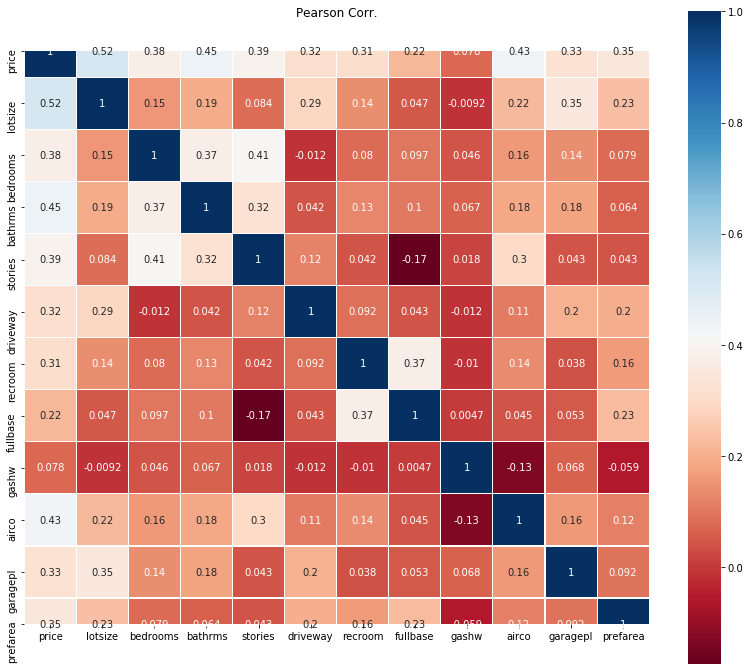

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(data.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Splitting the data

In [0]:
y = data['price'] 
X = data.drop('price', 1)

<a id="section6"></a>
## 6. Modelling and Prediction

<a id="section601"></a>
## 6.1 Getting some classifiers to evaluate

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
# here we are using hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

Learn More about [Voting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Split the data into train and test data.

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

Let’s look at each classifier’s accuracy on the test set:

In [0]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.585635359116022
RandomForestClassifier 0.6408839779005525
SVC 0.5138121546961326
VotingClassifier 0.6519337016574586



There you have it! The __voting classifier__ slightly outperforms all the individual classifiers.

-  This majority-vote classifier is called a hard voting classifier 

<center><img src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0702.png" height=400 width=600/></center>

<a id="section602"></a>
## 6.2 When to and how to use soft voting


If all classifiers are able to estimate class probabilities (i.e., they all have a __predict_proba()__ method), then you can tell __Scikit-Learn__ to predict the __class__ with the __highest class probability__, averaged over all the __individual classifiers__. This is called soft voting.

### Types of Voting Classifier

<center><img src="https://i.ytimg.com/vi/BlrcCpypfhU/maxresdefault.jpg" height=300 width=300/></center>
<br>
<center>__ Hard vs Soft voting __</center>

- __Hard voting__: is where a model is selected from an ensemble to make the final prediction by a simple __majority vote__ for accuracy.

<br>


- __Soft Voting__: can only be done when all your classifiers can __calculate probabilities__ for the outcomes. __Soft voting__ arrives at the best result by averaging out the __probabilities__ calculated by individual algorithms.

<a id="section603"></a>
## 6.3 Create Bagging Classifiers

Another approach is to use the same training algorithm for every predictor and train them on __different random subsets__ of the training set. When sampling is performed with __replacement__, this method is called __bagging__.

<center><img src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0704.png" height=350 width=550/>

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# decision tree classifier

dclf=DecisionTreeClassifier()
dclf.fit(X_train,y_train)
y_pred1=dclf.predict(X_test)




print("Accuracy of Decision Tree classifier is {0}".format(accuracy_score(y_test, y_pred1)))
print("Accuracy of Bagging classifier is {0}".format(accuracy_score(y_test, y_pred)))

Accuracy of Decision Tree classifier is 0.6022099447513812
Accuracy of Bagging classifier is 0.6464088397790055


__Note__: See here our bagging classifier outperforms the decision tree classifiers.

<a id="section604"></a>
## 6.4 Create Boosting Classifiers

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


Learn more about [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [0]:
reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
scores_ada = cross_val_score(reg_ada, X, y, cv=6)
scores_ada.mean()

0.5970695970695972

In [0]:
score = []
for depth in [1,2,10] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = cross_val_score(reg_ada, X, y, cv=6)
    score.append(scores_ada.mean())


print(score)

[0.5970695970695972, 0.6062271062271063, 0.6282051282051283]


And the maximal score is reached for a depth of 10 in this simple example, with an accuracy of 62.8%

<a id="section7"></a>
## 7. Model Comparison

| Algorithms                                                                                     | Accuracy Score                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:| 
| __Logistic Regression__ | __58.5%__ |
| __Random Forest__ | __64.0%__ |
| __Decision Tree Classifier__| __60.2%__| 
| __Bagging Classifier__ | __64.6%__ |
| __Boosting Classifier__ | __62.8%__ |
| __SVC__| __51.3%__| 
| __Voting Classifier__| __65.1%__| 

<a id="section8"></a>
## 8. Conclusion

- Here we see that each of Ensemble learning classifier is better compared to the individual classifiers. 